In [1]:
# Kirolous Shenouda
# July 8, 2021
# Bike Store Sales Data
#
# This dataset contains information about bike store purchases made across several countries. My goal for this project
# is to provide quantitative and categorical analysis. Some details I want to investigate further include how sales
# for these stores evolved between 2011 to 2016, what the most popular items were, the distribution of customers'
# ages and age groups, the association between unit cost and unit price, and more.

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
sales = pd.read_csv('sales_data.csv')

In [119]:
sales.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [9]:
# The average age of the bike store customer is about 36
sales['Customer_Age'].mean()

35.91921157861212

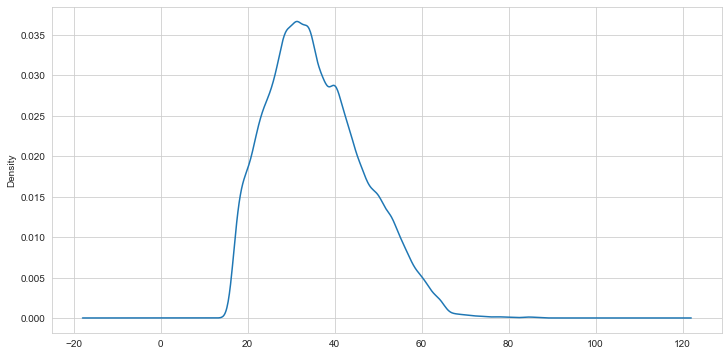

In [11]:
sales['Customer_Age'].plot(kind = 'kde', figsize = (12,6))

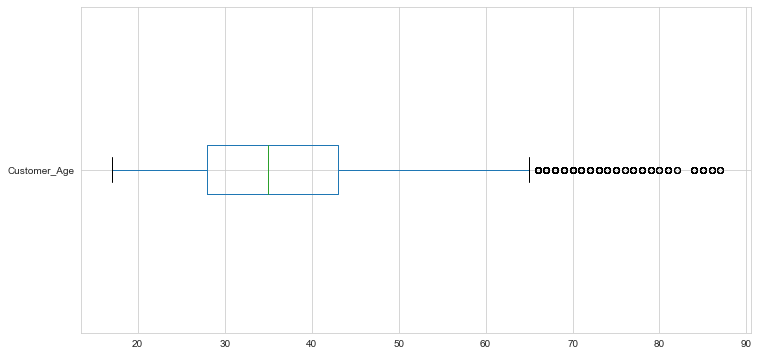

In [12]:
sales['Customer_Age'].plot(kind = 'box', figsize = (12,6), vert = False)

In [88]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

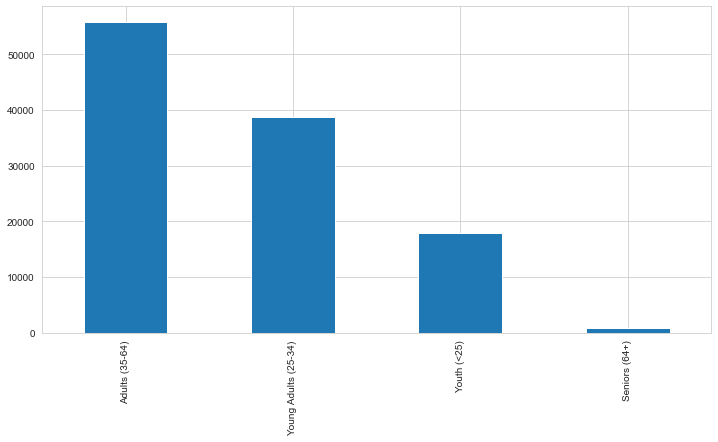

In [90]:
# The most common age group for this company are adults between the years of 35 and 64
sales['Age_Group'].value_counts().plot(kind = 'bar', figsize = (12, 6))

In [13]:
# The average number of items purchased was about 12
sales['Order_Quantity'].mean()

11.901659648253654

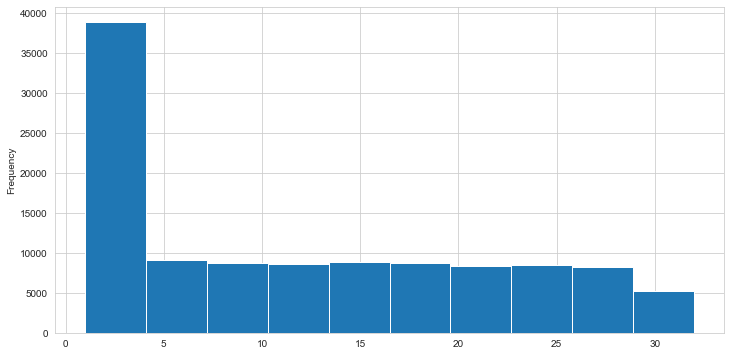

In [21]:
sales['Order_Quantity'].plot(kind = 'hist', figsize=(12,6))

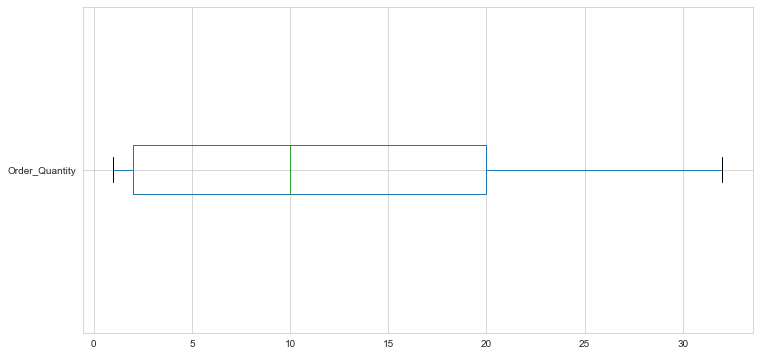

In [26]:
sales['Order_Quantity'].plot(kind = 'box', figsize = (12,6), vert = False)

In [32]:
# Number of sales per year
sales['Year'].value_counts(sort = False)

2011     2677
2012     2677
2013    24443
2014    29398
2015    24443
2016    29398
Name: Year, dtype: int64

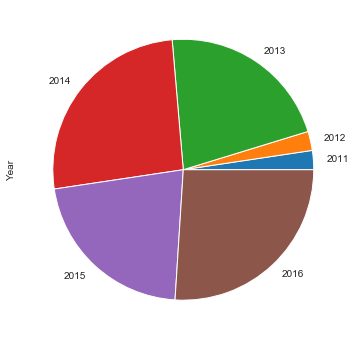

In [36]:
sales['Year'].value_counts(sort = False).plot(kind = 'pie', figsize = (12,6))

In [93]:
# Number of sales per month
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

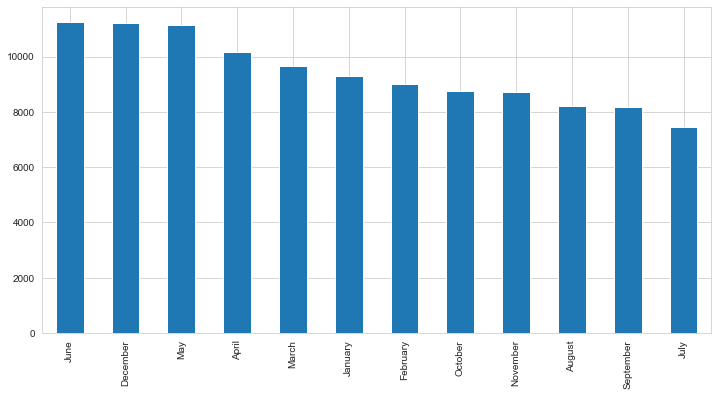

In [94]:
# June is a popular month for this bike company. The next three most common months are December, May, and April
# I'm not sure about December, but it makes sense that more bike products are bought right before the summer months
sales['Month'].value_counts().plot(kind = 'bar', figsize = (12,6))

In [128]:
# Number of sales by country
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

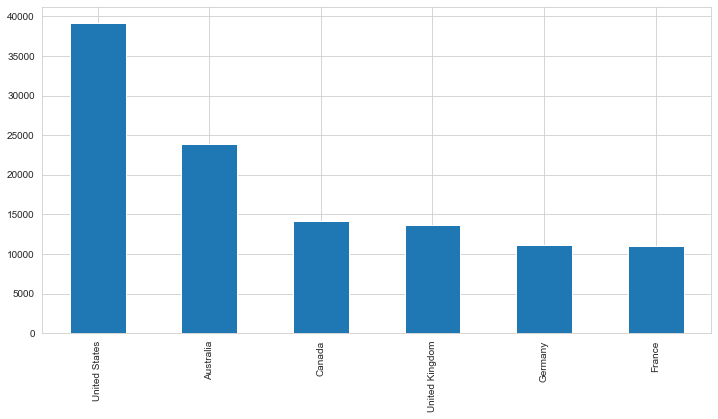

In [123]:
# The US has the highest quantity of sales with about 40000
sales['Country'].value_counts().plot(kind = 'bar', figsize = (12,6))

In [132]:
# The bike stores sell 130 unique items
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

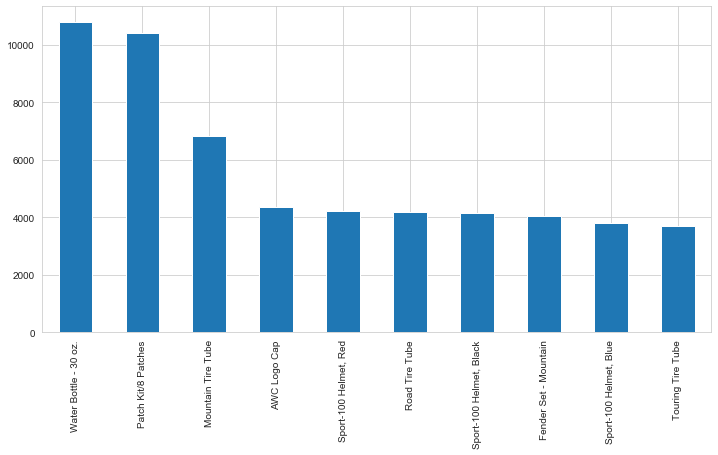

In [135]:
# The top 10 most sold products
sales['Product'].value_counts().head(10).plot(kind = 'bar', figsize = (12,6))

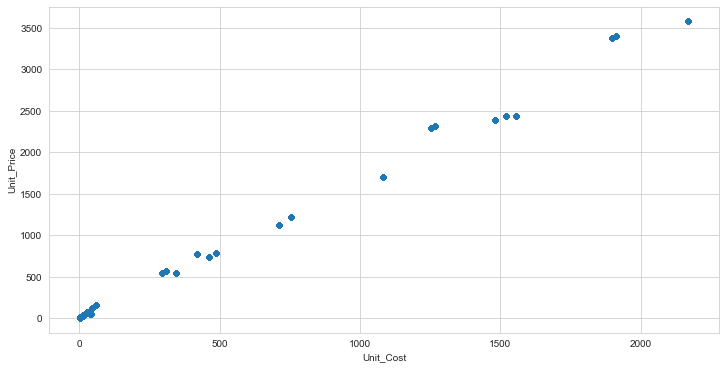

In [138]:
# There is a strong relationship between unit cost and unit price. Generally, as the unit cost increases, so does 
# the unit price.
sales.plot(kind = 'scatter', x = 'Unit_Cost', y = 'Unit_Price', figsize = (12,6))

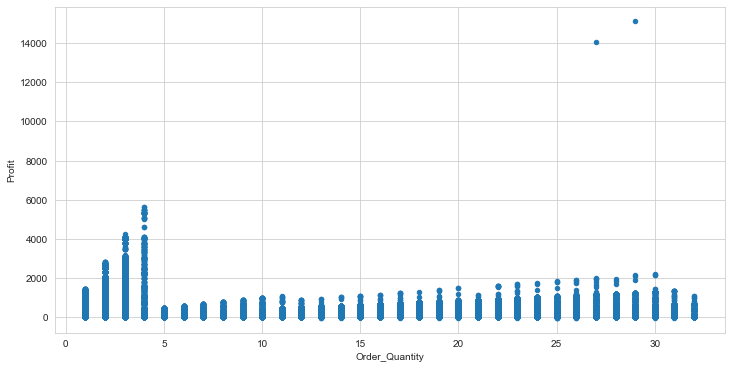

In [139]:
# There does not seem to be a relationship bewteen order quantity and profit. Profit seems to remain consistent
# as order quantity increases after 5.
sales.plot(kind = 'scatter', x = 'Order_Quantity', y = 'Profit', figsize = (12,6))

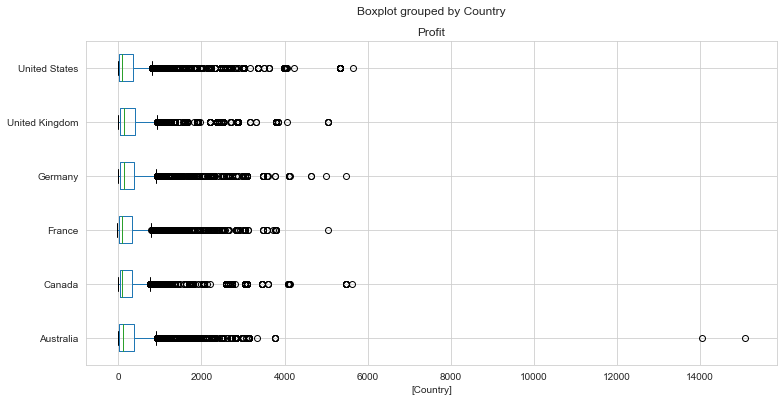

In [142]:
# The distribution of profits across the different countries are similar
sales[['Profit', 'Country']].boxplot(by = 'Country', vert = False, figsize = (12,6))

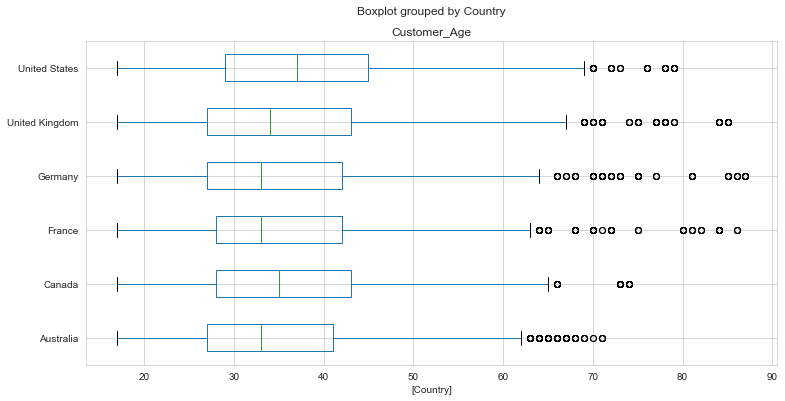

In [145]:
# There is a moderate consistency of customers' ages across different countries. 
sales[['Customer_Age', 'Country']].boxplot(by = 'Country', vert = False, figsize = (12,6))

In [324]:
# I created another column that arranges the date in YYYY-MM-DD format
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis = 1)

In [325]:
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [326]:
# I turned this column into a datetime object
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

In [327]:
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

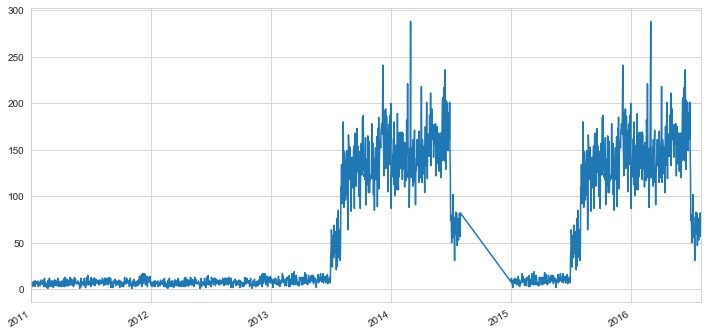

In [328]:
# Sales for this store remained low and steady from 2011 to mid-2014, then increases till mid-2014, decreased till
# mid-2015, increased again till 2016. There was a slight dip in sales at the end of 2016. 
sales['Calculated_Date'].value_counts().plot(kind = 'line', figsize = (12,6))

In [155]:
sales['Revenue'] += 50

In [158]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2451,2014-03-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2138,2016-03-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,468,2014-05-15


In [181]:
# Number of sales made in Canada or France: 25176
# sales[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')]
sales[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

In [183]:
# Number of bike racks sold in Canada
# sales[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')]
sales[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

In [192]:
# Number of orders made in each region/state of France
france_states = sales[sales['Country'] == 'France']['State'].value_counts()

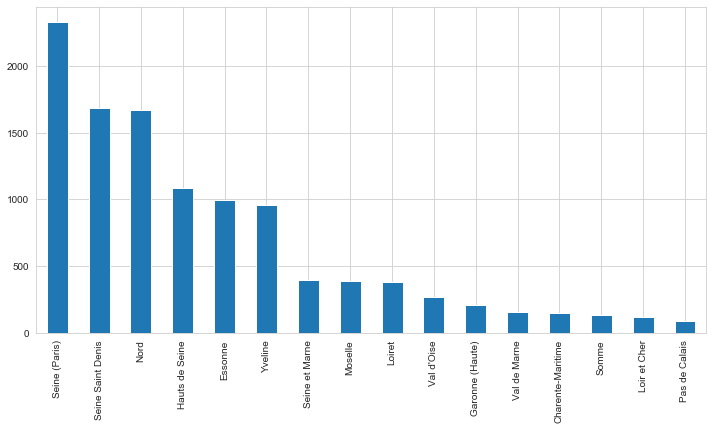

In [194]:
# More orders are made in Paris than in other regions/states of France
france_states.plot(kind = 'bar', figsize = (12,6))

In [198]:
# Number of sales made per category
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

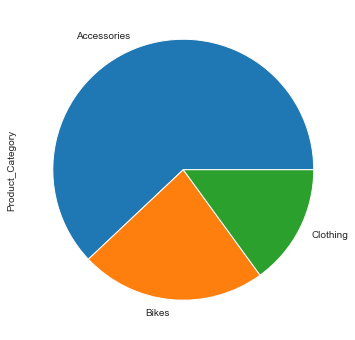

In [200]:
# Accessories are the most popular item bought from this bike store
# Accessories include helmets, bells, tires, etc
sales['Product_Category'].value_counts().plot(kind = 'pie', figsize = (12,6))

In [212]:
# Number of orders made per accessory sub-categories
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

In [213]:
accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

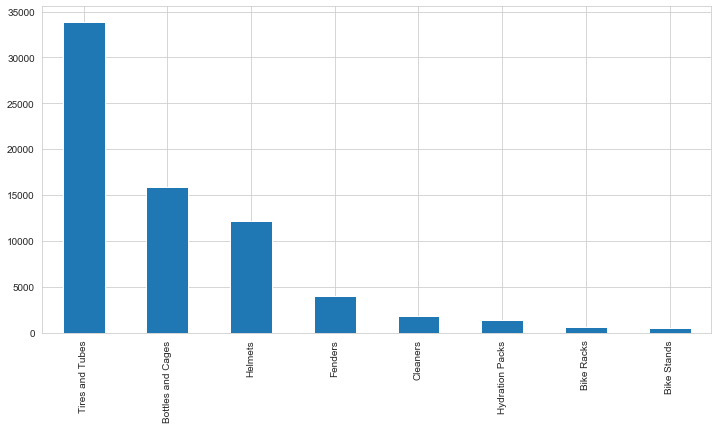

In [214]:
# Tires and tubes are the most common accessory bought from this bike company
accessories.plot(kind = 'bar', figsize = (12,6))

In [217]:
# Number of orders made per bike sub-categories
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

In [218]:
bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

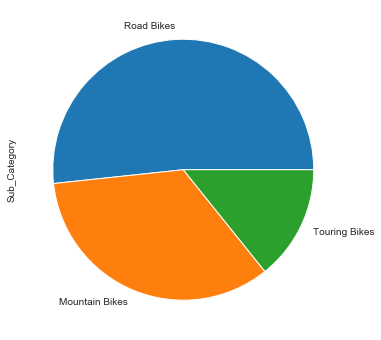

In [219]:
# Road bikes are the most popular type of bike, ahead of mountain bikes and touring bikes
bikes.plot(kind = 'pie', figsize = (12,6))

In [232]:
# Number of sales made by men and women
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

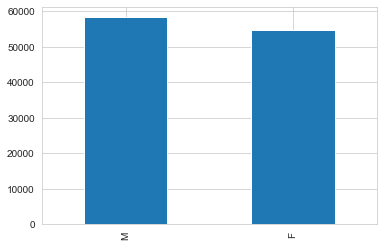

In [230]:
sales['Customer_Gender'].value_counts().plot(kind = 'bar')

In [245]:
# Number of sales with more than 500 in revenue made by men: 23342
# sales[(sales['Revenue'] > 500) & (sales['Customer_Gender'] == 'M')]
sales[(sales['Revenue'] > 500) & (sales['Customer_Gender'] == 'M')]['Customer_Gender'].value_counts()

M    23342
Name: Customer_Gender, dtype: int64

In [252]:
# The top 5 sales with the highest revenue
sales.sort_values(['Revenue'], ascending = False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


In [255]:
# Sale with the highest revenue
# sales.sort_values(['Revenue'], ascending = False).head(1)
sales[sales['Revenue'] == sales['Revenue'].max()]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


In [264]:
sales[sales['Revenue'] > 10000]['Order_Quantity'].mean()

3.689265536723164

In [267]:
sales[sales['Revenue'] < 10000]['Order_Quantity'].mean()

11.914539380997528

In [272]:
# Number of sales made in May of 2016
# sales[(sales['Month'] == 'May') & (sales['Year'] == 2016)]
sales[(sales['Month'] == 'May') & (sales['Year'] == 2016)].shape[0]

5015

In [285]:
# Number of sales made between May and July of 2016
# sales[(sales['Month'].isin(['May', 'June', 'July'])) & (sales['Year'] == 2016)]
sales[(sales['Month'].isin(['May', 'June', 'July'])) & (sales['Year'] == 2016)].shape[0]

12164

In [296]:
# Box plot per month with profit values
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

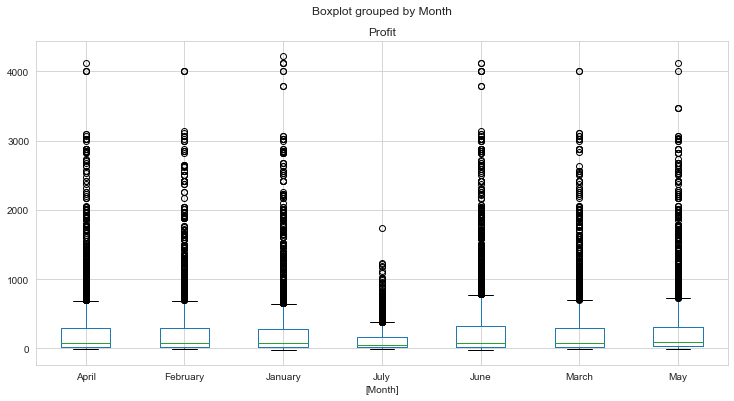

In [297]:
profit_2016.boxplot(by = 'Month', figsize = (12,6))